<a href="https://colab.research.google.com/github/PikoAll/machine-learning-e-deep-learning/blob/main/RetiNeuraliSettaggi%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ReteNeurale
molto utile per immaggini,video,audio e testi                                   
Caricamento img in tensori, estimator, CNN
CNN per MNIST e CELEBA
Uso di dataAugmentation per prevenire l'overfitting

carichiamo MNIST

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

y=y.astype(int)
X=((X/255.)-.5)*2

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000,random_state=123,stratify=y)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

Immaginare che i tensori sono degli array
#creazione di tensori a partire da una lista o un array

In [ ]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)

a=np.array([1,2,3],dtype=np.int32)
b=[4,5,6]

t_a=tf.convert_to_tensor(a)
t_b=tf.convert_to_tensor(b)

print(t_a)
print(t_b)

print(t_a.shape)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
(3,)


In [ ]:
t_a_new=tf.cast(t_a,tf.int64) #per fare il cast

#creo un tensore indicando la forma e poi faccio la trasposya
t=tf.random.uniform(shape=(3,5))
t_tr=tf.transpose(t)
print(t)
print(t_tr)
print('\n')
# ---------------Cambioforma diun tensore da 1D a 2D
t=tf.zeros((30,))
t_reshape=tf.reshape(t,shape=(5,6))
print(t)
print(t_reshape)
print('\n')


tf.Tensor(
[[0.119 0.68  0.671 0.559 0.368]
 [0.951 0.136 0.163 0.365 0.577]
 [0.151 0.934 0.501 0.176 0.791]], shape=(3, 5), dtype=float32)
tf.Tensor(
[[0.119 0.951 0.151]
 [0.68  0.136 0.934]
 [0.671 0.163 0.501]
 [0.559 0.365 0.176]
 [0.368 0.577 0.791]], shape=(5, 3), dtype=float32)


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], shape=(30,), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]], shape=(5, 6), dtype=float32)




Ora carico un dataset di 6 img dal locale

['img/cat-01.jpg', 'img/cat-02.jpg', 'img/cat-03.jpg', 'img/dog-01.jpg', 'img/dog-02.jpg', 'img/dog-03.jpg']
Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


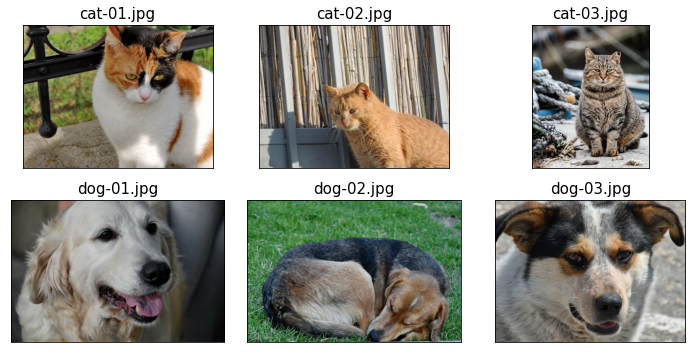

In [ ]:
import pathlib

imgdir_path = pathlib.Path('img')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

#visualizzo le immagini caricate
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
# plt.savefig('ch13-catdot-examples.pdf')
plt.tight_layout()
plt.show()

etichette [0, 0, 0, 1, 1, 1]
b'img/cat-01.jpg' 0
b'img/cat-02.jpg' 0
b'img/cat-03.jpg' 0
b'img/dog-01.jpg' 1
b'img/dog-02.jpg' 1
b'img/dog-03.jpg' 1
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


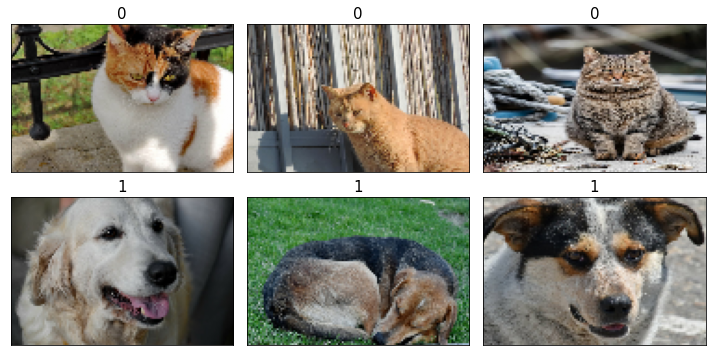

In [ ]:
#le etichette sono i nomi dei file, quindi ora assegneremo 1 ai cani 0 ai gatti
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print('etichette',labels)

#ora creo un dataset aggiungento alle immagini le lore etichette(un dataset tensorflow)
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

# -------------- Carico le img e faccio un risize
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
#plt.savefig('ch13-catdog-dataset.pdf')
plt.show()

uso di iris

In [ ]:
import tensorflow_datasets as tfds
iris,irisInfo=tfds.load('iris',with_info=True)
print(irisInfo)

ds_orig=iris['train']
ds_orig=dsOrigin.shuffle(150,reshuffle_each_iteration=False)


ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

next(iter(ds_train_orig))

tfds.core.DatasetInfo(
    name='iris',
    version=2.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.',
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "Dua, Dheeru and Graff, Casey",
    year = "2017",
    title = "{UCI} Machine Learning Repository",
    url = "http://archiv

NameError: ignored

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(16,activation='sigmoid',name='fc1', input_shape=(4,)),
                           tf.keras.layers.Dense(3,activation='softmax',name='fc2')
                           
])
model.summary()

In [ ]:
model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)

ora plotto i grafici per vedere che andamento c'e stato per ogni epoca

In [ ]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

In [ ]:
results = model.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

#Salvataggio e ricarica del modello

In [ ]:
model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

iris_model_new.summary()

results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

per layer nascosti si consiglia di usare come funzione di attivazionetangente iperbolica,
la funzione di attivazione sigmoide(imita abbastanza bene il comportamento del cervello)

In [ ]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16, 
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    ))

model.add(
    tf.keras.layers.Dense(
        units=32, 
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    ))

model.build(input_shape=(None, 4))
model.summary()

Alternativa alla creazione di un modello

In [ ]:
tf.random.set_seed(1)

## input layer:
inputs = tf.keras.Input(shape=(2,))

## layer nascosti
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

## output:
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

## construct a model:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

#Estimator
Gli stimatori rappresentano un modello completo ma sembrano anche abbastanza intuitivi per meno utenti. L'API Estimator fornisce metodi per addestrare il modello, giudicare l'accuratezza del modello e generare previsioni.
Gli stimatori racchiudono quattro caratteristiche principali:
Addestramento: formeranno un modello su un dato input per un numero fisso di passaggi
Valutazione : valuteranno il modello in base a un set di test.
Previsione : gli stimatori eseguiranno l'inferenza utilizzando il modello addestrato.
Esporta il tuo modello per la pubblicazione .
Inoltre, lo stimatore include il comportamento predefinito comune ai lavori di addestramento, come il salvataggio e il ripristino dei checkpoint, la creazione di riepiloghi, ecc. Uno stimatore richiederà di scrivere un model_fn e un input_fn che corrispondono al modello e alle parti di input del tuo TensorFlow grafico.
Gli stimatori hanno numerosi vantaggi:
Gli stimatori semplificano la condivisione delle implementazioni tra gli sviluppatori di modelli.
Puoi sviluppare un ottimo modello con codice intuitivo di alto livello, poiché di solito sono più facili da usare se devi creare modelli rispetto alle API TensorFlow di basso livello.
Gli stimatori stessi sono costruiti su tf.keras.layers, il che rende la personalizzazione molto più semplice.
Gli stimatori ti semplificheranno la vita costruendo il grafico per te.
Gli stimatori forniscono un ciclo di formazione distribuito in modo sicuro che controlla come e quando:
costruisci il grafico
inizializzare le variabili
caricare dati
gestire le eccezioni
creare file di checkpoint e recuperare da errori
salva i riepiloghi per TensorBoard

uso di estimator su dataset MNIST

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

#Preprocess image

In [ ]:
def preprocess(item):
  image=item['image']
  label=item['label']
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.reshape(image,(-1,))
  return {'image-pixels':image}, label[..., tf.newaxis]


Passo uno, defifinre due funzioni una per l'addestramento e una per la valutazione

In [ ]:
def train_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_train = datasets['train']

    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

def eval_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset

#definizione delle colonne delle carateristiche
## Step 2: feature column
image_feature_column = tf.feature_column.numeric_column(
    key='image-pixels', shape=(28*28))################################################################

Estimator

In [ ]:
dnn_classifier=tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32,16],
    n_classes=10,
    model_dir='models/mnist-dnn/')

dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)

eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print(eval_result)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


Instructions for updating:
Use standard file utilities to get mtimes.


Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:loss = 0.4621536, step = 18760


INFO:tensorflow:loss = 0.4621536, step = 18760


INFO:tensorflow:global_step/sec: 205.025


INFO:tensorflow:global_step/sec: 205.025


INFO:tensorflow:loss = 0.5713898, step = 18860 (0.492 sec)


INFO:tensorflow:loss = 0.5713898, step = 18860 (0.492 sec)


INFO:tensorflow:global_step/sec: 220.316


INFO:tensorflow:global_step/sec: 220.316


INFO:tensorflow:loss = 0.42405653, step = 18960 (0.455 sec)


INFO:tensorflow:loss = 0.42405653, step = 18960 (0.455 sec)


INFO:tensorflow:global_step/sec: 213.135


INFO:tensorflow:global_step/sec: 213.135


INFO:tensorflow:loss = 0.43243834, step = 19060 (0.468 sec)


INFO:tensorflow:loss = 0.43243834, step = 19060 (0.468 sec)


INFO:tensorflow:global_step/sec: 187.708


INFO:tensorflow:global_step/sec: 187.708


INFO:tensorflow:loss = 0.5713252, step = 19160 (0.532 sec)


INFO:tensorflow:loss = 0.5713252, step = 19160 (0.532 sec)


INFO:tensorflow:global_step/sec: 169.598


INFO:tensorflow:global_step/sec: 169.598


INFO:tensorflow:loss = 0.39353365, step = 19260 (0.590 sec)


INFO:tensorflow:loss = 0.39353365, step = 19260 (0.590 sec)


INFO:tensorflow:global_step/sec: 208.208


INFO:tensorflow:global_step/sec: 208.208


INFO:tensorflow:loss = 0.39473623, step = 19360 (0.482 sec)


INFO:tensorflow:loss = 0.39473623, step = 19360 (0.482 sec)


INFO:tensorflow:global_step/sec: 211.668


INFO:tensorflow:global_step/sec: 211.668


INFO:tensorflow:loss = 0.411081, step = 19460 (0.470 sec)


INFO:tensorflow:loss = 0.411081, step = 19460 (0.470 sec)


INFO:tensorflow:global_step/sec: 238.559


INFO:tensorflow:global_step/sec: 238.559


INFO:tensorflow:loss = 0.4318488, step = 19560 (0.420 sec)


INFO:tensorflow:loss = 0.4318488, step = 19560 (0.420 sec)


INFO:tensorflow:global_step/sec: 552.965


INFO:tensorflow:global_step/sec: 552.965


INFO:tensorflow:loss = 0.3485853, step = 19660 (0.181 sec)


INFO:tensorflow:loss = 0.3485853, step = 19660 (0.181 sec)


INFO:tensorflow:global_step/sec: 206.49


INFO:tensorflow:global_step/sec: 206.49


INFO:tensorflow:loss = 0.37227154, step = 19760 (0.484 sec)


INFO:tensorflow:loss = 0.37227154, step = 19760 (0.484 sec)


INFO:tensorflow:global_step/sec: 303.279


INFO:tensorflow:global_step/sec: 303.279


INFO:tensorflow:loss = 0.30663902, step = 19860 (0.330 sec)


INFO:tensorflow:loss = 0.30663902, step = 19860 (0.330 sec)


INFO:tensorflow:global_step/sec: 328.004


INFO:tensorflow:global_step/sec: 328.004


INFO:tensorflow:loss = 0.46591252, step = 19960 (0.304 sec)


INFO:tensorflow:loss = 0.46591252, step = 19960 (0.304 sec)


INFO:tensorflow:global_step/sec: 300.728


INFO:tensorflow:global_step/sec: 300.728


INFO:tensorflow:loss = 0.44800177, step = 20060 (0.332 sec)


INFO:tensorflow:loss = 0.44800177, step = 20060 (0.332 sec)


INFO:tensorflow:global_step/sec: 317.289


INFO:tensorflow:global_step/sec: 317.289


INFO:tensorflow:loss = 0.404796, step = 20160 (0.316 sec)


INFO:tensorflow:loss = 0.404796, step = 20160 (0.316 sec)


INFO:tensorflow:global_step/sec: 312.558


INFO:tensorflow:global_step/sec: 312.558


INFO:tensorflow:loss = 0.3431896, step = 20260 (0.321 sec)


INFO:tensorflow:loss = 0.3431896, step = 20260 (0.321 sec)


INFO:tensorflow:global_step/sec: 318.584


INFO:tensorflow:global_step/sec: 318.584


INFO:tensorflow:loss = 0.30329436, step = 20360 (0.313 sec)


INFO:tensorflow:loss = 0.30329436, step = 20360 (0.313 sec)


INFO:tensorflow:global_step/sec: 303.409


INFO:tensorflow:global_step/sec: 303.409


INFO:tensorflow:loss = 0.63419193, step = 20460 (0.331 sec)


INFO:tensorflow:loss = 0.63419193, step = 20460 (0.331 sec)


INFO:tensorflow:global_step/sec: 458.459


INFO:tensorflow:global_step/sec: 458.459


INFO:tensorflow:loss = 0.3749632, step = 20560 (0.215 sec)


INFO:tensorflow:loss = 0.3749632, step = 20560 (0.215 sec)


INFO:tensorflow:global_step/sec: 237.627


INFO:tensorflow:global_step/sec: 237.627


INFO:tensorflow:loss = 0.46550706, step = 20660 (0.424 sec)


INFO:tensorflow:loss = 0.46550706, step = 20660 (0.424 sec)


INFO:tensorflow:global_step/sec: 308.989


INFO:tensorflow:global_step/sec: 308.989


INFO:tensorflow:loss = 0.3259644, step = 20760 (0.323 sec)


INFO:tensorflow:loss = 0.3259644, step = 20760 (0.323 sec)


INFO:tensorflow:global_step/sec: 300.072


INFO:tensorflow:global_step/sec: 300.072


INFO:tensorflow:loss = 0.52871335, step = 20860 (0.333 sec)


INFO:tensorflow:loss = 0.52871335, step = 20860 (0.333 sec)


INFO:tensorflow:global_step/sec: 292.997


INFO:tensorflow:global_step/sec: 292.997


INFO:tensorflow:loss = 0.40380514, step = 20960 (0.341 sec)


INFO:tensorflow:loss = 0.40380514, step = 20960 (0.341 sec)


INFO:tensorflow:global_step/sec: 316.51


INFO:tensorflow:global_step/sec: 316.51


INFO:tensorflow:loss = 0.40846154, step = 21060 (0.315 sec)


INFO:tensorflow:loss = 0.40846154, step = 21060 (0.315 sec)


INFO:tensorflow:global_step/sec: 309.407


INFO:tensorflow:global_step/sec: 309.407


INFO:tensorflow:loss = 0.26119626, step = 21160 (0.325 sec)


INFO:tensorflow:loss = 0.26119626, step = 21160 (0.325 sec)


INFO:tensorflow:global_step/sec: 316.319


INFO:tensorflow:global_step/sec: 316.319


INFO:tensorflow:loss = 0.22989546, step = 21260 (0.317 sec)


INFO:tensorflow:loss = 0.22989546, step = 21260 (0.317 sec)


INFO:tensorflow:global_step/sec: 278.516


INFO:tensorflow:global_step/sec: 278.516


INFO:tensorflow:loss = 0.4012779, step = 21360 (0.359 sec)


INFO:tensorflow:loss = 0.4012779, step = 21360 (0.359 sec)


INFO:tensorflow:global_step/sec: 336.833


INFO:tensorflow:global_step/sec: 336.833


INFO:tensorflow:loss = 0.43635753, step = 21460 (0.296 sec)


INFO:tensorflow:loss = 0.43635753, step = 21460 (0.296 sec)


INFO:tensorflow:global_step/sec: 546.982


INFO:tensorflow:global_step/sec: 546.982


INFO:tensorflow:loss = 0.21684207, step = 21560 (0.182 sec)


INFO:tensorflow:loss = 0.21684207, step = 21560 (0.182 sec)


INFO:tensorflow:global_step/sec: 191.92


INFO:tensorflow:global_step/sec: 191.92


INFO:tensorflow:loss = 0.36532146, step = 21660 (0.521 sec)


INFO:tensorflow:loss = 0.36532146, step = 21660 (0.521 sec)


INFO:tensorflow:global_step/sec: 302.327


INFO:tensorflow:global_step/sec: 302.327


INFO:tensorflow:loss = 0.31524646, step = 21760 (0.331 sec)


INFO:tensorflow:loss = 0.31524646, step = 21760 (0.331 sec)


INFO:tensorflow:global_step/sec: 302.337


INFO:tensorflow:global_step/sec: 302.337


INFO:tensorflow:loss = 0.3979097, step = 21860 (0.331 sec)


INFO:tensorflow:loss = 0.3979097, step = 21860 (0.331 sec)


INFO:tensorflow:global_step/sec: 319.243


INFO:tensorflow:global_step/sec: 319.243


INFO:tensorflow:loss = 0.31543133, step = 21960 (0.312 sec)


INFO:tensorflow:loss = 0.31543133, step = 21960 (0.312 sec)


INFO:tensorflow:global_step/sec: 322.81


INFO:tensorflow:global_step/sec: 322.81


INFO:tensorflow:loss = 0.45347065, step = 22060 (0.311 sec)


INFO:tensorflow:loss = 0.45347065, step = 22060 (0.311 sec)


INFO:tensorflow:global_step/sec: 315.51


INFO:tensorflow:global_step/sec: 315.51


INFO:tensorflow:loss = 0.44858253, step = 22160 (0.317 sec)


INFO:tensorflow:loss = 0.44858253, step = 22160 (0.317 sec)


INFO:tensorflow:global_step/sec: 311.939


INFO:tensorflow:global_step/sec: 311.939


INFO:tensorflow:loss = 0.39639908, step = 22260 (0.320 sec)


INFO:tensorflow:loss = 0.39639908, step = 22260 (0.320 sec)


INFO:tensorflow:global_step/sec: 317.351


INFO:tensorflow:global_step/sec: 317.351


INFO:tensorflow:loss = 0.37864608, step = 22360 (0.316 sec)


INFO:tensorflow:loss = 0.37864608, step = 22360 (0.316 sec)


INFO:tensorflow:global_step/sec: 557.637


INFO:tensorflow:global_step/sec: 557.637


INFO:tensorflow:loss = 0.3482619, step = 22460 (0.181 sec)


INFO:tensorflow:loss = 0.3482619, step = 22460 (0.181 sec)


INFO:tensorflow:global_step/sec: 225.683


INFO:tensorflow:global_step/sec: 225.683


INFO:tensorflow:loss = 0.36584896, step = 22560 (0.444 sec)


INFO:tensorflow:loss = 0.36584896, step = 22560 (0.444 sec)


INFO:tensorflow:global_step/sec: 315.995


INFO:tensorflow:global_step/sec: 315.995


INFO:tensorflow:loss = 0.39663392, step = 22660 (0.314 sec)


INFO:tensorflow:loss = 0.39663392, step = 22660 (0.314 sec)


INFO:tensorflow:global_step/sec: 308.661


INFO:tensorflow:global_step/sec: 308.661


INFO:tensorflow:loss = 0.28215247, step = 22760 (0.324 sec)


INFO:tensorflow:loss = 0.28215247, step = 22760 (0.324 sec)


INFO:tensorflow:global_step/sec: 280.324


INFO:tensorflow:global_step/sec: 280.324


INFO:tensorflow:loss = 0.37681752, step = 22860 (0.357 sec)


INFO:tensorflow:loss = 0.37681752, step = 22860 (0.357 sec)


INFO:tensorflow:global_step/sec: 310.216


INFO:tensorflow:global_step/sec: 310.216


INFO:tensorflow:loss = 0.40080163, step = 22960 (0.322 sec)


INFO:tensorflow:loss = 0.40080163, step = 22960 (0.322 sec)


INFO:tensorflow:global_step/sec: 292.751


INFO:tensorflow:global_step/sec: 292.751


INFO:tensorflow:loss = 0.2777359, step = 23060 (0.344 sec)


INFO:tensorflow:loss = 0.2777359, step = 23060 (0.344 sec)


INFO:tensorflow:global_step/sec: 305.039


INFO:tensorflow:global_step/sec: 305.039


INFO:tensorflow:loss = 0.41596207, step = 23160 (0.325 sec)


INFO:tensorflow:loss = 0.41596207, step = 23160 (0.325 sec)


INFO:tensorflow:global_step/sec: 327.309


INFO:tensorflow:global_step/sec: 327.309


INFO:tensorflow:loss = 0.3907643, step = 23260 (0.306 sec)


INFO:tensorflow:loss = 0.3907643, step = 23260 (0.306 sec)


INFO:tensorflow:global_step/sec: 419.767


INFO:tensorflow:global_step/sec: 419.767


INFO:tensorflow:loss = 0.3400033, step = 23360 (0.238 sec)


INFO:tensorflow:loss = 0.3400033, step = 23360 (0.238 sec)


INFO:tensorflow:global_step/sec: 255.455


INFO:tensorflow:global_step/sec: 255.455


INFO:tensorflow:loss = 0.5104493, step = 23460 (0.391 sec)


INFO:tensorflow:loss = 0.5104493, step = 23460 (0.391 sec)


INFO:tensorflow:global_step/sec: 312.294


INFO:tensorflow:global_step/sec: 312.294


INFO:tensorflow:loss = 0.33904567, step = 23560 (0.322 sec)


INFO:tensorflow:loss = 0.33904567, step = 23560 (0.322 sec)


INFO:tensorflow:global_step/sec: 314.678


INFO:tensorflow:global_step/sec: 314.678


INFO:tensorflow:loss = 0.62415946, step = 23660 (0.316 sec)


INFO:tensorflow:loss = 0.62415946, step = 23660 (0.316 sec)


INFO:tensorflow:global_step/sec: 294.667


INFO:tensorflow:global_step/sec: 294.667


INFO:tensorflow:loss = 0.3737225, step = 23760 (0.341 sec)


INFO:tensorflow:loss = 0.3737225, step = 23760 (0.341 sec)


INFO:tensorflow:global_step/sec: 323.006


INFO:tensorflow:global_step/sec: 323.006


INFO:tensorflow:loss = 0.23888898, step = 23860 (0.310 sec)


INFO:tensorflow:loss = 0.23888898, step = 23860 (0.310 sec)


INFO:tensorflow:global_step/sec: 316.73


INFO:tensorflow:global_step/sec: 316.73


INFO:tensorflow:loss = 0.25932223, step = 23960 (0.313 sec)


INFO:tensorflow:loss = 0.25932223, step = 23960 (0.313 sec)


INFO:tensorflow:global_step/sec: 321.21


INFO:tensorflow:global_step/sec: 321.21


INFO:tensorflow:loss = 0.3168234, step = 24060 (0.311 sec)


INFO:tensorflow:loss = 0.3168234, step = 24060 (0.311 sec)


INFO:tensorflow:global_step/sec: 315.314


INFO:tensorflow:global_step/sec: 315.314


INFO:tensorflow:loss = 0.30978543, step = 24160 (0.318 sec)


INFO:tensorflow:loss = 0.30978543, step = 24160 (0.318 sec)


INFO:tensorflow:global_step/sec: 348.958


INFO:tensorflow:global_step/sec: 348.958


INFO:tensorflow:loss = 0.45853946, step = 24260 (0.285 sec)


INFO:tensorflow:loss = 0.45853946, step = 24260 (0.285 sec)


INFO:tensorflow:global_step/sec: 578.099


INFO:tensorflow:global_step/sec: 578.099


INFO:tensorflow:loss = 0.51868445, step = 24360 (0.174 sec)


INFO:tensorflow:loss = 0.51868445, step = 24360 (0.174 sec)


INFO:tensorflow:global_step/sec: 214.708


INFO:tensorflow:global_step/sec: 214.708


INFO:tensorflow:loss = 0.40698588, step = 24460 (0.465 sec)


INFO:tensorflow:loss = 0.40698588, step = 24460 (0.465 sec)


INFO:tensorflow:global_step/sec: 319.655


INFO:tensorflow:global_step/sec: 319.655


INFO:tensorflow:loss = 0.47610623, step = 24560 (0.314 sec)


INFO:tensorflow:loss = 0.47610623, step = 24560 (0.314 sec)


INFO:tensorflow:global_step/sec: 325.672


INFO:tensorflow:global_step/sec: 325.672


INFO:tensorflow:loss = 0.5090817, step = 24660 (0.307 sec)


INFO:tensorflow:loss = 0.5090817, step = 24660 (0.307 sec)


INFO:tensorflow:global_step/sec: 301.287


INFO:tensorflow:global_step/sec: 301.287


INFO:tensorflow:loss = 0.47939408, step = 24760 (0.333 sec)


INFO:tensorflow:loss = 0.47939408, step = 24760 (0.333 sec)


INFO:tensorflow:global_step/sec: 310.392


INFO:tensorflow:global_step/sec: 310.392


INFO:tensorflow:loss = 0.5301995, step = 24860 (0.321 sec)


INFO:tensorflow:loss = 0.5301995, step = 24860 (0.321 sec)


INFO:tensorflow:global_step/sec: 329.518


INFO:tensorflow:global_step/sec: 329.518


INFO:tensorflow:loss = 0.44898814, step = 24960 (0.303 sec)


INFO:tensorflow:loss = 0.44898814, step = 24960 (0.303 sec)


INFO:tensorflow:global_step/sec: 333.792


INFO:tensorflow:global_step/sec: 333.792


INFO:tensorflow:loss = 0.4415269, step = 25060 (0.302 sec)


INFO:tensorflow:loss = 0.4415269, step = 25060 (0.302 sec)


INFO:tensorflow:global_step/sec: 336.083


INFO:tensorflow:global_step/sec: 336.083


INFO:tensorflow:loss = 0.49556914, step = 25160 (0.295 sec)


INFO:tensorflow:loss = 0.49556914, step = 25160 (0.295 sec)


INFO:tensorflow:global_step/sec: 515.572


INFO:tensorflow:global_step/sec: 515.572


INFO:tensorflow:loss = 0.42518288, step = 25260 (0.195 sec)


INFO:tensorflow:loss = 0.42518288, step = 25260 (0.195 sec)


INFO:tensorflow:global_step/sec: 246.537


INFO:tensorflow:global_step/sec: 246.537


INFO:tensorflow:loss = 0.20598611, step = 25360 (0.404 sec)


INFO:tensorflow:loss = 0.20598611, step = 25360 (0.404 sec)


INFO:tensorflow:global_step/sec: 314.93


INFO:tensorflow:global_step/sec: 314.93


INFO:tensorflow:loss = 0.34875715, step = 25460 (0.317 sec)


INFO:tensorflow:loss = 0.34875715, step = 25460 (0.317 sec)


INFO:tensorflow:global_step/sec: 311.995


INFO:tensorflow:global_step/sec: 311.995


INFO:tensorflow:loss = 0.4071688, step = 25560 (0.321 sec)


INFO:tensorflow:loss = 0.4071688, step = 25560 (0.321 sec)


INFO:tensorflow:global_step/sec: 330.376


INFO:tensorflow:global_step/sec: 330.376


INFO:tensorflow:loss = 0.32161152, step = 25660 (0.305 sec)


INFO:tensorflow:loss = 0.32161152, step = 25660 (0.305 sec)


INFO:tensorflow:global_step/sec: 324.326


INFO:tensorflow:global_step/sec: 324.326


INFO:tensorflow:loss = 0.5145926, step = 25760 (0.306 sec)


INFO:tensorflow:loss = 0.5145926, step = 25760 (0.306 sec)


INFO:tensorflow:global_step/sec: 323.263


INFO:tensorflow:global_step/sec: 323.263


INFO:tensorflow:loss = 0.46634555, step = 25860 (0.309 sec)


INFO:tensorflow:loss = 0.46634555, step = 25860 (0.309 sec)


INFO:tensorflow:global_step/sec: 319.27


INFO:tensorflow:global_step/sec: 319.27


INFO:tensorflow:loss = 0.36631882, step = 25960 (0.315 sec)


INFO:tensorflow:loss = 0.36631882, step = 25960 (0.315 sec)


INFO:tensorflow:global_step/sec: 329.422


INFO:tensorflow:global_step/sec: 329.422


INFO:tensorflow:loss = 0.3897947, step = 26060 (0.302 sec)


INFO:tensorflow:loss = 0.3897947, step = 26060 (0.302 sec)


INFO:tensorflow:global_step/sec: 389.58


INFO:tensorflow:global_step/sec: 389.58


INFO:tensorflow:loss = 0.34862447, step = 26160 (0.256 sec)


INFO:tensorflow:loss = 0.34862447, step = 26160 (0.256 sec)


INFO:tensorflow:global_step/sec: 552.011


INFO:tensorflow:global_step/sec: 552.011


INFO:tensorflow:loss = 0.28132907, step = 26260 (0.180 sec)


INFO:tensorflow:loss = 0.28132907, step = 26260 (0.180 sec)


INFO:tensorflow:global_step/sec: 186.556


INFO:tensorflow:global_step/sec: 186.556


INFO:tensorflow:loss = 0.42877024, step = 26360 (0.539 sec)


INFO:tensorflow:loss = 0.42877024, step = 26360 (0.539 sec)


INFO:tensorflow:global_step/sec: 301.334


INFO:tensorflow:global_step/sec: 301.334


INFO:tensorflow:loss = 0.3502457, step = 26460 (0.329 sec)


INFO:tensorflow:loss = 0.3502457, step = 26460 (0.329 sec)


INFO:tensorflow:global_step/sec: 308.243


INFO:tensorflow:global_step/sec: 308.243


INFO:tensorflow:loss = 0.2549858, step = 26560 (0.325 sec)


INFO:tensorflow:loss = 0.2549858, step = 26560 (0.325 sec)


INFO:tensorflow:global_step/sec: 315.146


INFO:tensorflow:global_step/sec: 315.146


INFO:tensorflow:loss = 0.544501, step = 26660 (0.318 sec)


INFO:tensorflow:loss = 0.544501, step = 26660 (0.318 sec)


INFO:tensorflow:global_step/sec: 307.751


INFO:tensorflow:global_step/sec: 307.751


INFO:tensorflow:loss = 0.4967413, step = 26760 (0.325 sec)


INFO:tensorflow:loss = 0.4967413, step = 26760 (0.325 sec)


INFO:tensorflow:global_step/sec: 308.628


INFO:tensorflow:global_step/sec: 308.628


INFO:tensorflow:loss = 0.32289425, step = 26860 (0.324 sec)


INFO:tensorflow:loss = 0.32289425, step = 26860 (0.324 sec)


INFO:tensorflow:global_step/sec: 324.968


INFO:tensorflow:global_step/sec: 324.968


INFO:tensorflow:loss = 0.30696926, step = 26960 (0.306 sec)


INFO:tensorflow:loss = 0.30696926, step = 26960 (0.306 sec)


INFO:tensorflow:global_step/sec: 343.813


INFO:tensorflow:global_step/sec: 343.813


INFO:tensorflow:loss = 0.27134353, step = 27060 (0.292 sec)


INFO:tensorflow:loss = 0.27134353, step = 27060 (0.292 sec)


INFO:tensorflow:global_step/sec: 568.486


INFO:tensorflow:global_step/sec: 568.486


INFO:tensorflow:loss = 0.2654916, step = 27160 (0.175 sec)


INFO:tensorflow:loss = 0.2654916, step = 27160 (0.175 sec)


INFO:tensorflow:global_step/sec: 225.645


INFO:tensorflow:global_step/sec: 225.645


INFO:tensorflow:loss = 0.32339978, step = 27260 (0.443 sec)


INFO:tensorflow:loss = 0.32339978, step = 27260 (0.443 sec)


INFO:tensorflow:global_step/sec: 322.51


INFO:tensorflow:global_step/sec: 322.51


INFO:tensorflow:loss = 0.21846838, step = 27360 (0.312 sec)


INFO:tensorflow:loss = 0.21846838, step = 27360 (0.312 sec)


INFO:tensorflow:global_step/sec: 306.069


INFO:tensorflow:global_step/sec: 306.069


INFO:tensorflow:loss = 0.47323915, step = 27460 (0.326 sec)


INFO:tensorflow:loss = 0.47323915, step = 27460 (0.326 sec)


INFO:tensorflow:global_step/sec: 301.967


INFO:tensorflow:global_step/sec: 301.967


INFO:tensorflow:loss = 0.37527, step = 27560 (0.331 sec)


INFO:tensorflow:loss = 0.37527, step = 27560 (0.331 sec)


INFO:tensorflow:global_step/sec: 312.91


INFO:tensorflow:global_step/sec: 312.91


INFO:tensorflow:loss = 0.346611, step = 27660 (0.319 sec)


INFO:tensorflow:loss = 0.346611, step = 27660 (0.319 sec)


INFO:tensorflow:global_step/sec: 329.065


INFO:tensorflow:global_step/sec: 329.065


INFO:tensorflow:loss = 0.47801065, step = 27760 (0.302 sec)


INFO:tensorflow:loss = 0.47801065, step = 27760 (0.302 sec)


INFO:tensorflow:global_step/sec: 311.868


INFO:tensorflow:global_step/sec: 311.868


INFO:tensorflow:loss = 0.3607406, step = 27860 (0.323 sec)


INFO:tensorflow:loss = 0.3607406, step = 27860 (0.323 sec)


INFO:tensorflow:global_step/sec: 308.303


INFO:tensorflow:global_step/sec: 308.303


INFO:tensorflow:loss = 0.3665297, step = 27960 (0.323 sec)


INFO:tensorflow:loss = 0.3665297, step = 27960 (0.323 sec)


INFO:tensorflow:global_step/sec: 464.132


INFO:tensorflow:global_step/sec: 464.132


INFO:tensorflow:loss = 0.32176626, step = 28060 (0.217 sec)


INFO:tensorflow:loss = 0.32176626, step = 28060 (0.217 sec)


INFO:tensorflow:global_step/sec: 223.848


INFO:tensorflow:global_step/sec: 223.848


INFO:tensorflow:loss = 0.22980094, step = 28160 (0.445 sec)


INFO:tensorflow:loss = 0.22980094, step = 28160 (0.445 sec)


INFO:tensorflow:global_step/sec: 317.956


INFO:tensorflow:global_step/sec: 317.956


INFO:tensorflow:loss = 0.4368592, step = 28260 (0.316 sec)


INFO:tensorflow:loss = 0.4368592, step = 28260 (0.316 sec)


INFO:tensorflow:global_step/sec: 317.772


INFO:tensorflow:global_step/sec: 317.772


INFO:tensorflow:loss = 0.3333761, step = 28360 (0.315 sec)


INFO:tensorflow:loss = 0.3333761, step = 28360 (0.315 sec)


INFO:tensorflow:global_step/sec: 312.795


INFO:tensorflow:global_step/sec: 312.795


INFO:tensorflow:loss = 0.43173313, step = 28460 (0.319 sec)


INFO:tensorflow:loss = 0.43173313, step = 28460 (0.319 sec)


INFO:tensorflow:global_step/sec: 315.509


INFO:tensorflow:global_step/sec: 315.509


INFO:tensorflow:loss = 0.3628912, step = 28560 (0.317 sec)


INFO:tensorflow:loss = 0.3628912, step = 28560 (0.317 sec)


INFO:tensorflow:global_step/sec: 314.67


INFO:tensorflow:global_step/sec: 314.67


INFO:tensorflow:loss = 0.3759644, step = 28660 (0.318 sec)


INFO:tensorflow:loss = 0.3759644, step = 28660 (0.318 sec)


INFO:tensorflow:global_step/sec: 298.144


INFO:tensorflow:global_step/sec: 298.144


INFO:tensorflow:loss = 0.2542633, step = 28760 (0.335 sec)


INFO:tensorflow:loss = 0.2542633, step = 28760 (0.335 sec)


INFO:tensorflow:global_step/sec: 329.231


INFO:tensorflow:global_step/sec: 329.231


INFO:tensorflow:loss = 0.4437091, step = 28860 (0.304 sec)


INFO:tensorflow:loss = 0.4437091, step = 28860 (0.304 sec)


INFO:tensorflow:global_step/sec: 374.158


INFO:tensorflow:global_step/sec: 374.158


INFO:tensorflow:loss = 0.42912316, step = 28960 (0.269 sec)


INFO:tensorflow:loss = 0.42912316, step = 28960 (0.269 sec)


INFO:tensorflow:global_step/sec: 552.395


INFO:tensorflow:global_step/sec: 552.395


INFO:tensorflow:loss = 0.33190525, step = 29060 (0.180 sec)


INFO:tensorflow:loss = 0.33190525, step = 29060 (0.180 sec)


INFO:tensorflow:global_step/sec: 208.042


INFO:tensorflow:global_step/sec: 208.042


INFO:tensorflow:loss = 0.3630919, step = 29160 (0.481 sec)


INFO:tensorflow:loss = 0.3630919, step = 29160 (0.481 sec)


INFO:tensorflow:global_step/sec: 316.286


INFO:tensorflow:global_step/sec: 316.286


INFO:tensorflow:loss = 0.33281124, step = 29260 (0.316 sec)


INFO:tensorflow:loss = 0.33281124, step = 29260 (0.316 sec)


INFO:tensorflow:global_step/sec: 325.092


INFO:tensorflow:global_step/sec: 325.092


INFO:tensorflow:loss = 0.30294144, step = 29360 (0.306 sec)


INFO:tensorflow:loss = 0.30294144, step = 29360 (0.306 sec)


INFO:tensorflow:global_step/sec: 294.191


INFO:tensorflow:global_step/sec: 294.191


INFO:tensorflow:loss = 0.35696897, step = 29460 (0.339 sec)


INFO:tensorflow:loss = 0.35696897, step = 29460 (0.339 sec)


INFO:tensorflow:global_step/sec: 312.825


INFO:tensorflow:global_step/sec: 312.825


INFO:tensorflow:loss = 0.4294848, step = 29560 (0.319 sec)


INFO:tensorflow:loss = 0.4294848, step = 29560 (0.319 sec)


INFO:tensorflow:global_step/sec: 295.051


INFO:tensorflow:global_step/sec: 295.051


INFO:tensorflow:loss = 0.3026182, step = 29660 (0.339 sec)


INFO:tensorflow:loss = 0.3026182, step = 29660 (0.339 sec)


INFO:tensorflow:global_step/sec: 299.699


INFO:tensorflow:global_step/sec: 299.699


INFO:tensorflow:loss = 0.40141785, step = 29760 (0.335 sec)


INFO:tensorflow:loss = 0.40141785, step = 29760 (0.335 sec)


INFO:tensorflow:global_step/sec: 297.133


INFO:tensorflow:global_step/sec: 297.133


INFO:tensorflow:loss = 0.41304344, step = 29860 (0.335 sec)


INFO:tensorflow:loss = 0.41304344, step = 29860 (0.335 sec)


INFO:tensorflow:global_step/sec: 552.329


INFO:tensorflow:global_step/sec: 552.329


INFO:tensorflow:loss = 0.24409649, step = 29960 (0.181 sec)


INFO:tensorflow:loss = 0.24409649, step = 29960 (0.181 sec)


INFO:tensorflow:global_step/sec: 224.11


INFO:tensorflow:global_step/sec: 224.11


INFO:tensorflow:loss = 0.32005155, step = 30060 (0.450 sec)


INFO:tensorflow:loss = 0.32005155, step = 30060 (0.450 sec)


INFO:tensorflow:global_step/sec: 311.808


INFO:tensorflow:global_step/sec: 311.808


INFO:tensorflow:loss = 0.74703383, step = 30160 (0.320 sec)


INFO:tensorflow:loss = 0.74703383, step = 30160 (0.320 sec)


INFO:tensorflow:global_step/sec: 291.925


INFO:tensorflow:global_step/sec: 291.925


INFO:tensorflow:loss = 0.27612048, step = 30260 (0.340 sec)


INFO:tensorflow:loss = 0.27612048, step = 30260 (0.340 sec)


INFO:tensorflow:global_step/sec: 291.736


INFO:tensorflow:global_step/sec: 291.736


INFO:tensorflow:loss = 0.27497196, step = 30360 (0.345 sec)


INFO:tensorflow:loss = 0.27497196, step = 30360 (0.345 sec)


INFO:tensorflow:global_step/sec: 308.746


INFO:tensorflow:global_step/sec: 308.746


INFO:tensorflow:loss = 0.28158003, step = 30460 (0.323 sec)


INFO:tensorflow:loss = 0.28158003, step = 30460 (0.323 sec)


INFO:tensorflow:global_step/sec: 308.826


INFO:tensorflow:global_step/sec: 308.826


INFO:tensorflow:loss = 0.24462825, step = 30560 (0.323 sec)


INFO:tensorflow:loss = 0.24462825, step = 30560 (0.323 sec)


INFO:tensorflow:global_step/sec: 315.7


INFO:tensorflow:global_step/sec: 315.7


INFO:tensorflow:loss = 0.4868306, step = 30660 (0.315 sec)


INFO:tensorflow:loss = 0.4868306, step = 30660 (0.315 sec)


INFO:tensorflow:global_step/sec: 288.49


INFO:tensorflow:global_step/sec: 288.49


INFO:tensorflow:loss = 0.40932047, step = 30760 (0.349 sec)


INFO:tensorflow:loss = 0.40932047, step = 30760 (0.349 sec)


INFO:tensorflow:global_step/sec: 377.312


INFO:tensorflow:global_step/sec: 377.312


INFO:tensorflow:loss = 0.47617096, step = 30860 (0.263 sec)


INFO:tensorflow:loss = 0.47617096, step = 30860 (0.263 sec)


INFO:tensorflow:global_step/sec: 244.519


INFO:tensorflow:global_step/sec: 244.519


INFO:tensorflow:loss = 0.5610428, step = 30960 (0.408 sec)


INFO:tensorflow:loss = 0.5610428, step = 30960 (0.408 sec)


INFO:tensorflow:global_step/sec: 300.923


INFO:tensorflow:global_step/sec: 300.923


INFO:tensorflow:loss = 0.3421244, step = 31060 (0.335 sec)


INFO:tensorflow:loss = 0.3421244, step = 31060 (0.335 sec)


INFO:tensorflow:global_step/sec: 298.275


INFO:tensorflow:global_step/sec: 298.275


INFO:tensorflow:loss = 0.38153034, step = 31160 (0.335 sec)


INFO:tensorflow:loss = 0.38153034, step = 31160 (0.335 sec)


INFO:tensorflow:global_step/sec: 299.29


INFO:tensorflow:global_step/sec: 299.29


INFO:tensorflow:loss = 0.29537827, step = 31260 (0.333 sec)


INFO:tensorflow:loss = 0.29537827, step = 31260 (0.333 sec)


INFO:tensorflow:global_step/sec: 293.929


INFO:tensorflow:global_step/sec: 293.929


INFO:tensorflow:loss = 0.3484987, step = 31360 (0.342 sec)


INFO:tensorflow:loss = 0.3484987, step = 31360 (0.342 sec)


INFO:tensorflow:global_step/sec: 314.556


INFO:tensorflow:global_step/sec: 314.556


INFO:tensorflow:loss = 0.3131139, step = 31460 (0.316 sec)


INFO:tensorflow:loss = 0.3131139, step = 31460 (0.316 sec)


INFO:tensorflow:global_step/sec: 296.019


INFO:tensorflow:global_step/sec: 296.019


INFO:tensorflow:loss = 0.2807429, step = 31560 (0.341 sec)


INFO:tensorflow:loss = 0.2807429, step = 31560 (0.341 sec)


INFO:tensorflow:global_step/sec: 281.144


INFO:tensorflow:global_step/sec: 281.144


INFO:tensorflow:loss = 0.40337217, step = 31660 (0.354 sec)


INFO:tensorflow:loss = 0.40337217, step = 31660 (0.354 sec)


INFO:tensorflow:global_step/sec: 313.958


INFO:tensorflow:global_step/sec: 313.958


INFO:tensorflow:loss = 0.34131587, step = 31760 (0.319 sec)


INFO:tensorflow:loss = 0.34131587, step = 31760 (0.319 sec)


INFO:tensorflow:global_step/sec: 539.76


INFO:tensorflow:global_step/sec: 539.76


INFO:tensorflow:loss = 0.36915857, step = 31860 (0.184 sec)


INFO:tensorflow:loss = 0.36915857, step = 31860 (0.184 sec)


INFO:tensorflow:global_step/sec: 187.29


INFO:tensorflow:global_step/sec: 187.29


INFO:tensorflow:loss = 0.526589, step = 31960 (0.534 sec)


INFO:tensorflow:loss = 0.526589, step = 31960 (0.534 sec)


INFO:tensorflow:global_step/sec: 301.532


INFO:tensorflow:global_step/sec: 301.532


INFO:tensorflow:loss = 0.28673065, step = 32060 (0.333 sec)


INFO:tensorflow:loss = 0.28673065, step = 32060 (0.333 sec)


INFO:tensorflow:global_step/sec: 288.845


INFO:tensorflow:global_step/sec: 288.845


INFO:tensorflow:loss = 0.2706576, step = 32160 (0.348 sec)


INFO:tensorflow:loss = 0.2706576, step = 32160 (0.348 sec)


INFO:tensorflow:global_step/sec: 282.41


INFO:tensorflow:global_step/sec: 282.41


INFO:tensorflow:loss = 0.4828854, step = 32260 (0.350 sec)


INFO:tensorflow:loss = 0.4828854, step = 32260 (0.350 sec)


INFO:tensorflow:global_step/sec: 315.712


INFO:tensorflow:global_step/sec: 315.712


INFO:tensorflow:loss = 0.46802965, step = 32360 (0.318 sec)


INFO:tensorflow:loss = 0.46802965, step = 32360 (0.318 sec)


INFO:tensorflow:global_step/sec: 281.778


INFO:tensorflow:global_step/sec: 281.778


INFO:tensorflow:loss = 0.38872278, step = 32460 (0.355 sec)


INFO:tensorflow:loss = 0.38872278, step = 32460 (0.355 sec)


INFO:tensorflow:global_step/sec: 291.205


INFO:tensorflow:global_step/sec: 291.205


INFO:tensorflow:loss = 0.30897784, step = 32560 (0.345 sec)


INFO:tensorflow:loss = 0.30897784, step = 32560 (0.345 sec)


INFO:tensorflow:global_step/sec: 318.19


INFO:tensorflow:global_step/sec: 318.19


INFO:tensorflow:loss = 0.6224072, step = 32660 (0.314 sec)


INFO:tensorflow:loss = 0.6224072, step = 32660 (0.314 sec)


INFO:tensorflow:global_step/sec: 478.987


INFO:tensorflow:global_step/sec: 478.987


INFO:tensorflow:loss = 0.621413, step = 32760 (0.213 sec)


INFO:tensorflow:loss = 0.621413, step = 32760 (0.213 sec)


INFO:tensorflow:global_step/sec: 224.675


INFO:tensorflow:global_step/sec: 224.675


INFO:tensorflow:loss = 0.30749834, step = 32860 (0.441 sec)


INFO:tensorflow:loss = 0.30749834, step = 32860 (0.441 sec)


INFO:tensorflow:global_step/sec: 301.424


INFO:tensorflow:global_step/sec: 301.424


INFO:tensorflow:loss = 0.39498976, step = 32960 (0.332 sec)


INFO:tensorflow:loss = 0.39498976, step = 32960 (0.332 sec)


INFO:tensorflow:global_step/sec: 317.246


INFO:tensorflow:global_step/sec: 317.246


INFO:tensorflow:loss = 0.36875817, step = 33060 (0.316 sec)


INFO:tensorflow:loss = 0.36875817, step = 33060 (0.316 sec)


INFO:tensorflow:global_step/sec: 311.881


INFO:tensorflow:global_step/sec: 311.881


INFO:tensorflow:loss = 0.3556511, step = 33160 (0.319 sec)


INFO:tensorflow:loss = 0.3556511, step = 33160 (0.319 sec)


INFO:tensorflow:global_step/sec: 305.327


INFO:tensorflow:global_step/sec: 305.327


INFO:tensorflow:loss = 0.32723445, step = 33260 (0.328 sec)


INFO:tensorflow:loss = 0.32723445, step = 33260 (0.328 sec)


INFO:tensorflow:global_step/sec: 293.771


INFO:tensorflow:global_step/sec: 293.771


INFO:tensorflow:loss = 0.35350809, step = 33360 (0.344 sec)


INFO:tensorflow:loss = 0.35350809, step = 33360 (0.344 sec)


INFO:tensorflow:global_step/sec: 314.079


INFO:tensorflow:global_step/sec: 314.079


INFO:tensorflow:loss = 0.49755168, step = 33460 (0.314 sec)


INFO:tensorflow:loss = 0.49755168, step = 33460 (0.314 sec)


INFO:tensorflow:global_step/sec: 309.641


INFO:tensorflow:global_step/sec: 309.641


INFO:tensorflow:loss = 0.42623794, step = 33560 (0.325 sec)


INFO:tensorflow:loss = 0.42623794, step = 33560 (0.325 sec)


INFO:tensorflow:global_step/sec: 385.988


INFO:tensorflow:global_step/sec: 385.988


INFO:tensorflow:loss = 0.30701274, step = 33660 (0.258 sec)


INFO:tensorflow:loss = 0.30701274, step = 33660 (0.258 sec)


INFO:tensorflow:global_step/sec: 503.779


INFO:tensorflow:global_step/sec: 503.779


INFO:tensorflow:loss = 0.47360986, step = 33760 (0.199 sec)


INFO:tensorflow:loss = 0.47360986, step = 33760 (0.199 sec)


INFO:tensorflow:global_step/sec: 179.989


INFO:tensorflow:global_step/sec: 179.989


INFO:tensorflow:loss = 0.3728426, step = 33860 (0.555 sec)


INFO:tensorflow:loss = 0.3728426, step = 33860 (0.555 sec)


INFO:tensorflow:global_step/sec: 308.183


INFO:tensorflow:global_step/sec: 308.183


INFO:tensorflow:loss = 0.2843954, step = 33960 (0.324 sec)


INFO:tensorflow:loss = 0.2843954, step = 33960 (0.324 sec)


INFO:tensorflow:global_step/sec: 314.044


INFO:tensorflow:global_step/sec: 314.044


INFO:tensorflow:loss = 0.35495588, step = 34060 (0.322 sec)


INFO:tensorflow:loss = 0.35495588, step = 34060 (0.322 sec)


INFO:tensorflow:global_step/sec: 319.442


INFO:tensorflow:global_step/sec: 319.442


INFO:tensorflow:loss = 0.4467348, step = 34160 (0.310 sec)


INFO:tensorflow:loss = 0.4467348, step = 34160 (0.310 sec)


INFO:tensorflow:global_step/sec: 323.792


INFO:tensorflow:global_step/sec: 323.792


INFO:tensorflow:loss = 0.29428828, step = 34260 (0.310 sec)


INFO:tensorflow:loss = 0.29428828, step = 34260 (0.310 sec)


INFO:tensorflow:global_step/sec: 303.051


INFO:tensorflow:global_step/sec: 303.051


INFO:tensorflow:loss = 0.38171154, step = 34360 (0.331 sec)


INFO:tensorflow:loss = 0.38171154, step = 34360 (0.331 sec)


INFO:tensorflow:global_step/sec: 302.958


INFO:tensorflow:global_step/sec: 302.958


INFO:tensorflow:loss = 0.32612428, step = 34460 (0.329 sec)


INFO:tensorflow:loss = 0.32612428, step = 34460 (0.329 sec)


INFO:tensorflow:global_step/sec: 322.581


INFO:tensorflow:global_step/sec: 322.581


INFO:tensorflow:loss = 0.27077866, step = 34560 (0.309 sec)


INFO:tensorflow:loss = 0.27077866, step = 34560 (0.309 sec)


INFO:tensorflow:global_step/sec: 566.099


INFO:tensorflow:global_step/sec: 566.099


INFO:tensorflow:loss = 0.50995606, step = 34660 (0.177 sec)


INFO:tensorflow:loss = 0.50995606, step = 34660 (0.177 sec)


INFO:tensorflow:global_step/sec: 204.764


INFO:tensorflow:global_step/sec: 204.764


INFO:tensorflow:loss = 0.3124478, step = 34760 (0.489 sec)


INFO:tensorflow:loss = 0.3124478, step = 34760 (0.489 sec)


INFO:tensorflow:global_step/sec: 325.633


INFO:tensorflow:global_step/sec: 325.633


INFO:tensorflow:loss = 0.19613914, step = 34860 (0.307 sec)


INFO:tensorflow:loss = 0.19613914, step = 34860 (0.307 sec)


INFO:tensorflow:global_step/sec: 307.825


INFO:tensorflow:global_step/sec: 307.825


INFO:tensorflow:loss = 0.3009607, step = 34960 (0.329 sec)


INFO:tensorflow:loss = 0.3009607, step = 34960 (0.329 sec)


INFO:tensorflow:global_step/sec: 302.454


INFO:tensorflow:global_step/sec: 302.454


INFO:tensorflow:loss = 0.44175005, step = 35060 (0.327 sec)


INFO:tensorflow:loss = 0.44175005, step = 35060 (0.327 sec)


INFO:tensorflow:global_step/sec: 318.116


INFO:tensorflow:global_step/sec: 318.116


INFO:tensorflow:loss = 0.22208616, step = 35160 (0.312 sec)


INFO:tensorflow:loss = 0.22208616, step = 35160 (0.312 sec)


INFO:tensorflow:global_step/sec: 324.032


INFO:tensorflow:global_step/sec: 324.032


INFO:tensorflow:loss = 0.42255402, step = 35260 (0.309 sec)


INFO:tensorflow:loss = 0.42255402, step = 35260 (0.309 sec)


INFO:tensorflow:global_step/sec: 317.05


INFO:tensorflow:global_step/sec: 317.05


INFO:tensorflow:loss = 0.5422612, step = 35360 (0.315 sec)


INFO:tensorflow:loss = 0.5422612, step = 35360 (0.315 sec)


INFO:tensorflow:global_step/sec: 319.801


INFO:tensorflow:global_step/sec: 319.801


INFO:tensorflow:loss = 0.2666494, step = 35460 (0.314 sec)


INFO:tensorflow:loss = 0.2666494, step = 35460 (0.314 sec)


INFO:tensorflow:global_step/sec: 453.468


INFO:tensorflow:global_step/sec: 453.468


INFO:tensorflow:loss = 0.54796964, step = 35560 (0.221 sec)


INFO:tensorflow:loss = 0.54796964, step = 35560 (0.221 sec)


INFO:tensorflow:global_step/sec: 251.452


INFO:tensorflow:global_step/sec: 251.452


INFO:tensorflow:loss = 0.33255374, step = 35660 (0.399 sec)


INFO:tensorflow:loss = 0.33255374, step = 35660 (0.399 sec)


INFO:tensorflow:global_step/sec: 318.754


INFO:tensorflow:global_step/sec: 318.754


INFO:tensorflow:loss = 0.284451, step = 35760 (0.312 sec)


INFO:tensorflow:loss = 0.284451, step = 35760 (0.312 sec)


INFO:tensorflow:global_step/sec: 317.731


INFO:tensorflow:global_step/sec: 317.731


INFO:tensorflow:loss = 0.45136642, step = 35860 (0.318 sec)


INFO:tensorflow:loss = 0.45136642, step = 35860 (0.318 sec)


INFO:tensorflow:global_step/sec: 313.774


INFO:tensorflow:global_step/sec: 313.774


INFO:tensorflow:loss = 0.31437823, step = 35960 (0.317 sec)


INFO:tensorflow:loss = 0.31437823, step = 35960 (0.317 sec)


INFO:tensorflow:global_step/sec: 332.852


INFO:tensorflow:global_step/sec: 332.852


INFO:tensorflow:loss = 0.3727044, step = 36060 (0.299 sec)


INFO:tensorflow:loss = 0.3727044, step = 36060 (0.299 sec)


INFO:tensorflow:global_step/sec: 329.126


INFO:tensorflow:global_step/sec: 329.126


INFO:tensorflow:loss = 0.28182992, step = 36160 (0.303 sec)


INFO:tensorflow:loss = 0.28182992, step = 36160 (0.303 sec)


INFO:tensorflow:global_step/sec: 332.039


INFO:tensorflow:global_step/sec: 332.039


INFO:tensorflow:loss = 0.428931, step = 36260 (0.304 sec)


INFO:tensorflow:loss = 0.428931, step = 36260 (0.304 sec)


INFO:tensorflow:global_step/sec: 328.044


INFO:tensorflow:global_step/sec: 328.044


INFO:tensorflow:loss = 0.35833174, step = 36360 (0.304 sec)


INFO:tensorflow:loss = 0.35833174, step = 36360 (0.304 sec)


INFO:tensorflow:global_step/sec: 371.919


INFO:tensorflow:global_step/sec: 371.919


INFO:tensorflow:loss = 0.20067295, step = 36460 (0.267 sec)


INFO:tensorflow:loss = 0.20067295, step = 36460 (0.267 sec)


INFO:tensorflow:global_step/sec: 555.816


INFO:tensorflow:global_step/sec: 555.816


INFO:tensorflow:loss = 0.20640847, step = 36560 (0.183 sec)


INFO:tensorflow:loss = 0.20640847, step = 36560 (0.183 sec)


INFO:tensorflow:global_step/sec: 206.643


INFO:tensorflow:global_step/sec: 206.643


INFO:tensorflow:loss = 0.4634915, step = 36660 (0.485 sec)


INFO:tensorflow:loss = 0.4634915, step = 36660 (0.485 sec)


INFO:tensorflow:global_step/sec: 318.31


INFO:tensorflow:global_step/sec: 318.31


INFO:tensorflow:loss = 0.4037547, step = 36760 (0.312 sec)


INFO:tensorflow:loss = 0.4037547, step = 36760 (0.312 sec)


INFO:tensorflow:global_step/sec: 305.275


INFO:tensorflow:global_step/sec: 305.275


INFO:tensorflow:loss = 0.3612458, step = 36860 (0.325 sec)


INFO:tensorflow:loss = 0.3612458, step = 36860 (0.325 sec)


INFO:tensorflow:global_step/sec: 321.271


INFO:tensorflow:global_step/sec: 321.271


INFO:tensorflow:loss = 0.21671426, step = 36960 (0.313 sec)


INFO:tensorflow:loss = 0.21671426, step = 36960 (0.313 sec)


INFO:tensorflow:global_step/sec: 329.84


INFO:tensorflow:global_step/sec: 329.84


INFO:tensorflow:loss = 0.12585446, step = 37060 (0.304 sec)


INFO:tensorflow:loss = 0.12585446, step = 37060 (0.304 sec)


INFO:tensorflow:global_step/sec: 322.776


INFO:tensorflow:global_step/sec: 322.776


INFO:tensorflow:loss = 0.287413, step = 37160 (0.309 sec)


INFO:tensorflow:loss = 0.287413, step = 37160 (0.309 sec)


INFO:tensorflow:global_step/sec: 289.191


INFO:tensorflow:global_step/sec: 289.191


INFO:tensorflow:loss = 0.32648772, step = 37260 (0.346 sec)


INFO:tensorflow:loss = 0.32648772, step = 37260 (0.346 sec)


INFO:tensorflow:global_step/sec: 320.471


INFO:tensorflow:global_step/sec: 320.471


INFO:tensorflow:loss = 0.35490525, step = 37360 (0.311 sec)


INFO:tensorflow:loss = 0.35490525, step = 37360 (0.311 sec)


INFO:tensorflow:global_step/sec: 493.113


INFO:tensorflow:global_step/sec: 493.113


INFO:tensorflow:loss = 0.33672237, step = 37460 (0.204 sec)


INFO:tensorflow:loss = 0.33672237, step = 37460 (0.204 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 37520...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 37520...


INFO:tensorflow:Saving checkpoints for 37520 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 37520 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 37520...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 37520...


INFO:tensorflow:Loss for final step: 0.49662852.


INFO:tensorflow:Loss for final step: 0.49662852.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-10-10T09:39:26


INFO:tensorflow:Starting evaluation at 2021-10-10T09:39:26


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-37520


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-37520


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.85666s


INFO:tensorflow:Inference Time : 0.85666s


INFO:tensorflow:Finished evaluation at 2021-10-10-09:39:27


INFO:tensorflow:Finished evaluation at 2021-10-10-09:39:27


INFO:tensorflow:Saving dict for global step 37520: accuracy = 0.9053, average_loss = 0.33572665, global_step = 37520, loss = 0.33639443


INFO:tensorflow:Saving dict for global step 37520: accuracy = 0.9053, average_loss = 0.33572665, global_step = 37520, loss = 0.33639443


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 37520: models/mnist-dnn/model.ckpt-37520


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 37520: models/mnist-dnn/model.ckpt-37520


{'accuracy': 0.9053, 'average_loss': 0.33572665, 'loss': 0.33639443, 'global_step': 37520}


oppure

In [ ]:
## Step 1: Define the input functions
def train_input_fn(x_train, y_train, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices(
        ({'input-features':x_train}, y_train.reshape(-1, 1)))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(100).repeat().batch(batch_size)

def eval_input_fn(x_test, y_test=None, batch_size=8):
    if y_test is None:
        dataset = tf.data.Dataset.from_tensor_slices(
            {'input-features':x_test})
    else:
        dataset = tf.data.Dataset.from_tensor_slices(
            ({'input-features':x_test}, y_test.reshape(-1, 1)))


    # Shuffle, repeat, and batch the examples.
    return dataset.batch(batch_size)


## Step 2: Define the feature columns
features = [
    tf.feature_column.numeric_column(
        key='input-features:', shape=(2,))
]

In [ ]:
## Set random seeds for reproducibility
tf.random.set_seed(1)
np.random.seed(1)

## Create the data
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

In [ ]:
## Step 3: Create the estimator: convert from a Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), name='input-features'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

my_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator-for-XOR/')


num_epochs = 200
batch_size = 2
steps_per_epoch = np.ceil(len(x_train) / batch_size)

my_estimator.train(
    input_fn=lambda: train_input_fn(x_train, y_train, batch_size),
    #steps=num_epochs * steps_per_epoch
    steps=100
    )

#CNN

Conv2D molto utile,pooling(riduce le caratteristiche), regolarizzazione L1 e L2 servono pre prevenire l'overfitting, la scelta più comune e L2, usare il dropout per prevenire l'overfitting

Per ogni livelloe possibile mettere :
Conv2D(filter=16,kernel_size=(3,3), kernel_regularizer=kernel_regularizers.l2(0.001)                                                                           

per il dropout mettere 0.5                                                      
usare regolarizzazione ReLU nei livelli intermedi,

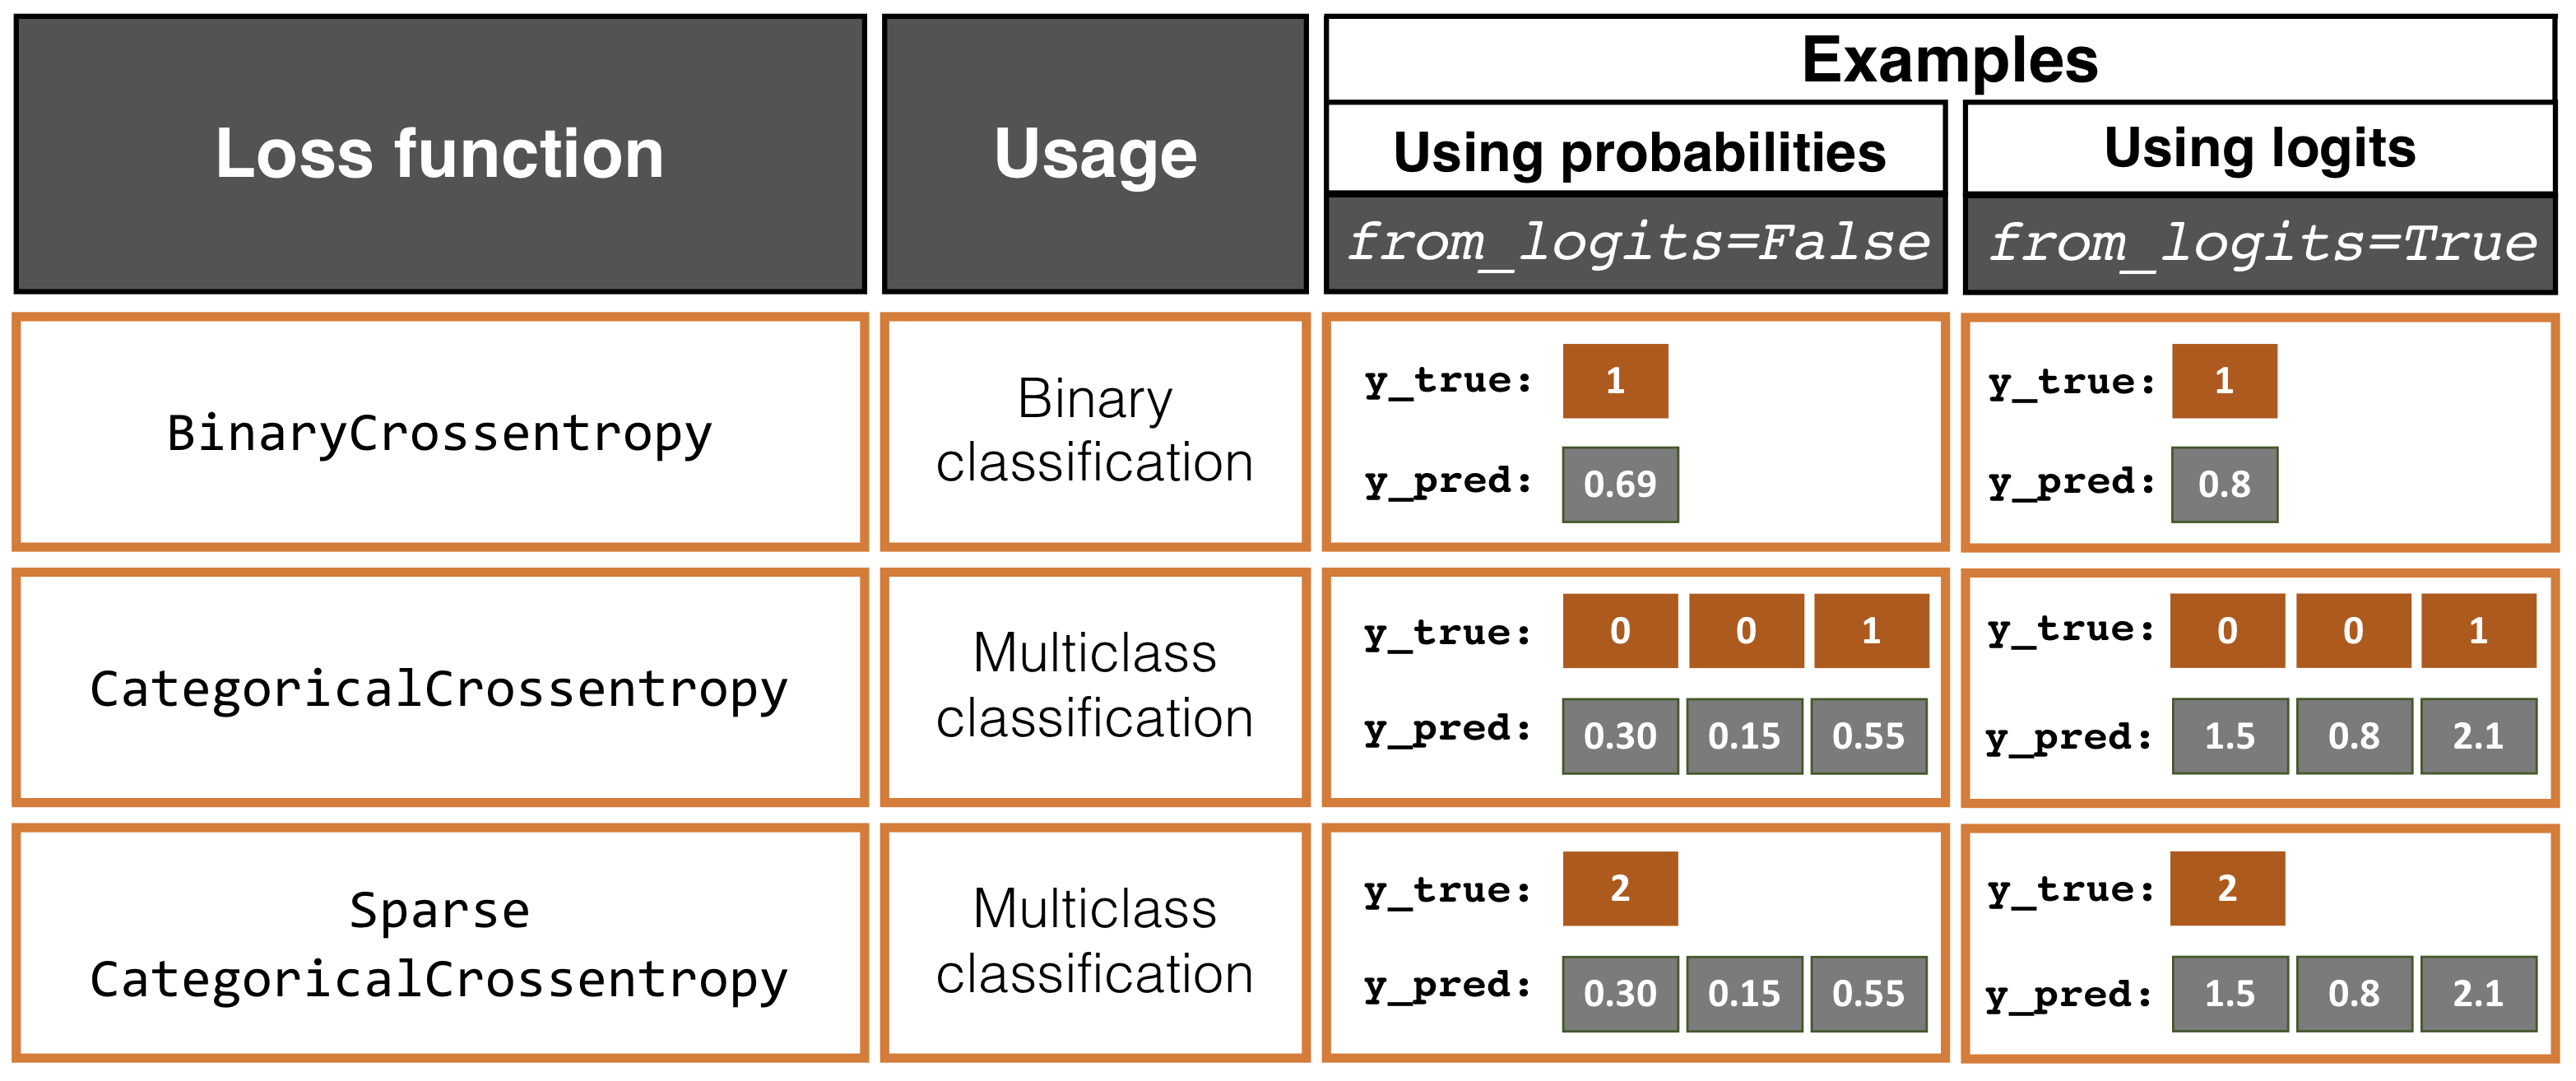

Caricamento e preelaborazione dei dati dataset MNIST

In [ ]:
import tensorflow_datasets as tfds

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
dict_keys(['test', 'train'])


Preelaboro e creo un dataset di convalida

In [ ]:
import tensorflow as tf

BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',data_format='channels_last',name='conv1',activation='relu'))#data_format='channels_last' mi permette di ommetere le dimensioni
model.add(MaxPool2D(pool_size=(2,2),name='pool1'))
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',name='conv2',activation='relu')) #5x5 indica la dimensione del kernel, padding0'same' mantiene le dimensioni spaziali
model.add(MaxPool2D(pool_size=(2,2),name='pool2'))

model.add(Flatten())#fare questo poiche alla livello sucessiovo non arrivi una dimensione maggiore da lui richiesta
model.add(Dense(units='1024',name='fc1',activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10,name='fc2',activation='softmax'))

In [ ]:
tf.random.set_seed(1)
model.compile(optimizer=tf.keras.optimizers.Adam(), #alternative ad adam sono RMSProp e AdaGrad
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 5s 5ms/step - loss: 0.1371 - accuracy: 0.9575 - val_loss: 0.0468 - val_accuracy: 0.9863
Epoch 2/20
782/782 [==============================] - 5s 5ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 3/20
782/782 [==============================] - 5s 5ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0407 - val_accuracy: 0.9889
Epoch 4/20
782/782 [==============================] - 5s 5ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0377 - val_accuracy: 0.9884
Epoch 5/20
782/782 [==============================] - 5s 5ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0378 - val_accuracy: 0.9905
Epoch 6/20
782/782 [==============================] - 5s 5ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0432 - val_accuracy: 0.9885
Epoch 7/20
782/782 [==============================] - 5s 5ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0402 - val_accuracy: 0.9901
Epoch 

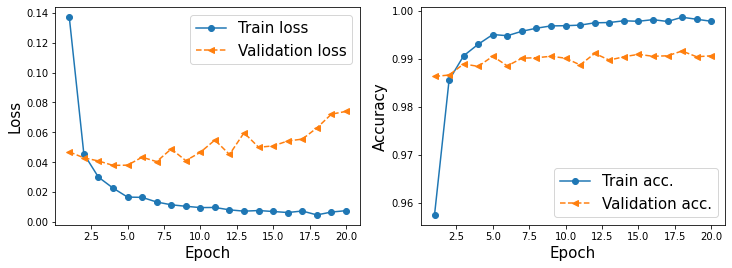

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [ ]:
test_results = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 1s 2ms/step - loss: 0.0522 - accuracy: 0.9921

Test Acc. 99.21%


TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


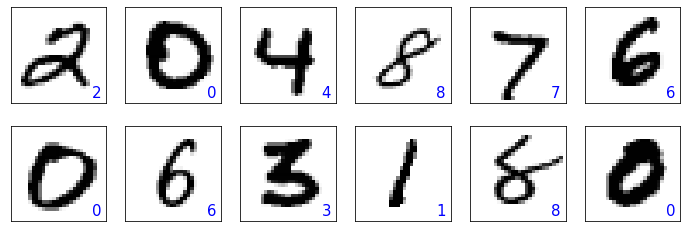

In [ ]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

Altro metodo per processare

In [ ]:
def preprocess(example, size=(64, 64), mode='train'):
    image = example['image']
    label = example['attributes']['Male']
    if mode == 'train':
        image_cropped = tf.image.random_crop(
            image, size=(178, 178, 3))
        image_resized = tf.image.resize(
            image_cropped, size=size)
        image_flip = tf.image.random_flip_left_right(
            image_resized)
        return (image_flip/255.0, tf.cast(label, tf.int32))
    
    else:
        image_cropped = tf.image.crop_to_bounding_box(
            image, offset_height=20, offset_width=0,
            target_height=178, target_width=178)
        image_resized = tf.image.resize(
            image_cropped, size=size)
        return (image_resized/255.0, tf.cast(label, tf.int32))

BATCH_SIZE = 32
BUFFER_SIZE = 1000
IMAGE_SIZE = (64, 64)
steps_per_epoch = np.ceil(16000/BATCH_SIZE)
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='train'))
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

ds_valid = celeba_valid.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='eval'))
ds_valid = ds_valid.batch(BATCH_SIZE)

Altra rete

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
])


model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(10, activation=None))   

In [ ]:
tf.random.set_seed(1)
model.compile(optimizer=tf.keras.optimizers.Adam(), #alternative ad adam sono RMSProp e AdaGrad
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 2.5505 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 2/20
782/782 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 3/20
782/782 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 4/20
782/782 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 5/20
782/782 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 7/20
782/782 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 

KeyboardInterrupt: ignored